In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("C:/Users/Mahendran/Desktop/spotify_project/spotify.xls",index_col=[0])

In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [90]:
df.columns

Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=5000)

In [7]:
pd.set_option('display.max_rows',100)

In [8]:
#checking for missing values
df.isna().sum()

song_1       0
song_2       0
song_3       0
song_4       0
song_5       0
            ..
song_4996    0
song_4997    0
song_4998    0
song_4999    0
song_5000    0
Length: 5000, dtype: int64

In [9]:
missing_values=df.isna().sum()
missing_values.isna().sum()

0

In [10]:
#checking for outliers
def outlier(x):
    out = []
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    outfence = q3+(1.5*iqr)
    infence = q1-(1.5*iqr)
    for i,j in enumerate(x):
        if (j>outfence) | (j<infence):
            out.append(i)
    return out

In [11]:
outlier(df.song_1)

[]

In [12]:
outlier(df.song_2500)

[]

In [13]:
outlier(df.song_3000)

[]

In [14]:
outlier(df.song_5000)

[]

In [15]:
def outliers_iqr(x):
    quartile_1, quartile_3 = np.percentile(df, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((df > upper_bound) | (df < lower_bound))

In [16]:
outliers_iqr(df)

(array([], dtype=int64), array([], dtype=int64))

<AxesSubplot: xlabel='song_766'>

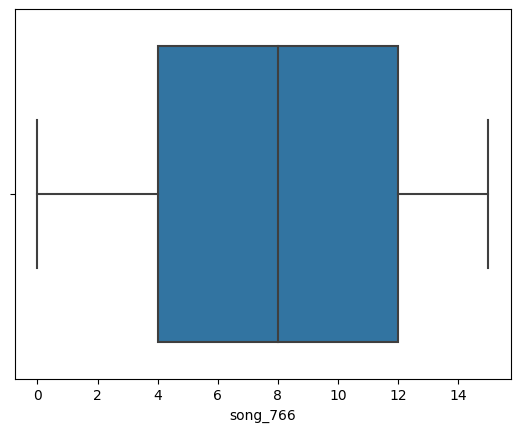

In [17]:
sns.boxplot(x=df['song_766'])

<AxesSubplot: xlabel='song_1058'>

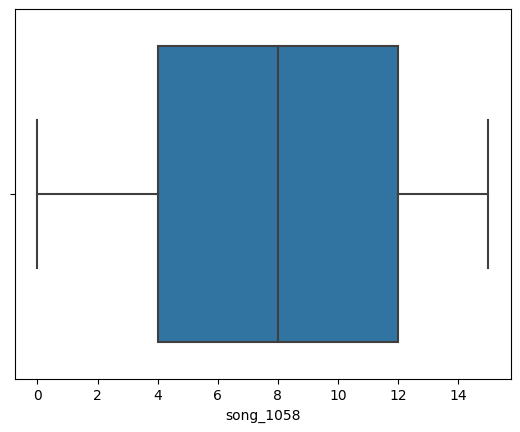

In [18]:
sns.boxplot(x=df['song_1058'])

<AxesSubplot: xlabel='song_4101'>

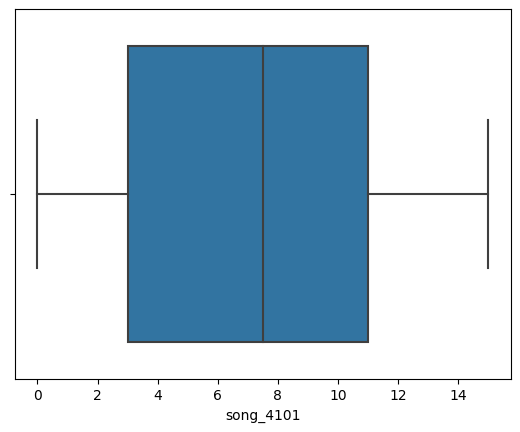

In [19]:
sns.boxplot(x=df['song_4101'])

<AxesSubplot: xlabel='song_4801'>

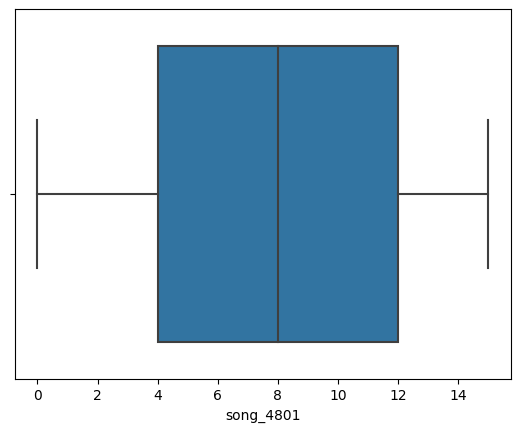

In [20]:
sns.boxplot(x=df['song_4801'])

<AxesSubplot: xlabel='song_4999'>

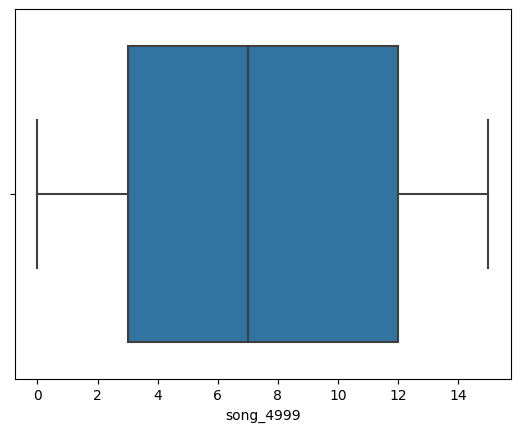

In [21]:
sns.boxplot(x=df['song_4999'])

In [22]:
# dimension of the dataset
df.shape

(1000, 5000)

In [23]:
sum_songs=df.sum(axis=0,skipna=True)

In [24]:
df1=pd.DataFrame(data=sum_songs,columns=['Num_of_times_heard'])
df1['song_num']=range(1,5001)
df1

,Num_of_times_heard,song_num
song_1,7584,1
song_2,7635,2
song_3,7748,3
song_4,7748,4
song_5,7693,5
...,...,...
song_4996,7749,4996
song_4997,7808,4997
song_4998,7406,4998
song_4999,7471,4999


In [25]:
df1['bins']=pd.cut(x=df1['Num_of_times_heard'],bins=3,labels=['Least Heard','Moderately Heard','Most heard'])
df1

,Num_of_times_heard,song_num,bins
song_1,7584,1,Moderately Heard
song_2,7635,2,Moderately Heard
song_3,7748,3,Most heard
song_4,7748,4,Most heard
song_5,7693,5,Most heard
...,...,...,...
song_4996,7749,4996,Most heard
song_4997,7808,4997,Most heard
song_4998,7406,4998,Moderately Heard
song_4999,7471,4999,Moderately Heard


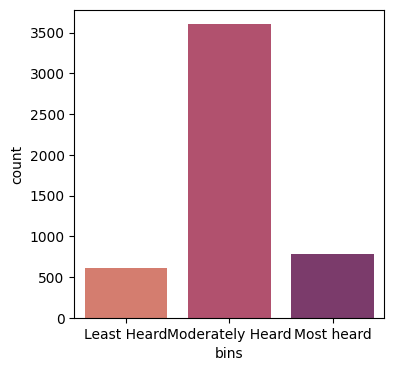

Moderately Heard    3602
Most heard           787
Least Heard          611
Name: bins, dtype: int64

In [26]:
import seaborn as sns
%matplotlib inline 
fig,ax=plt.subplots(figsize=(4,4))
sns.countplot(x='bins',data=df1,palette='flare')
plt.show()
df1['bins'].value_counts()

<AxesSubplot: xlabel='Num_of_times_heard', ylabel='song_num'>

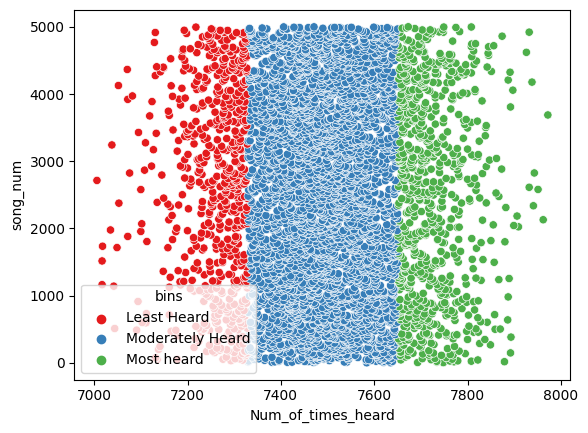

In [27]:
sns.scatterplot(x='Num_of_times_heard',y='song_num',data=df1,hue='bins',palette='Set1')

In [28]:
df1['bins'].value_counts()

Moderately Heard    3602
Most heard           787
Least Heard          611
Name: bins, dtype: int64

C:\Users\Mahendran\AppData\Local\Temp\ipykernel_10652\1900857474.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df1['Num_of_times_heard'])


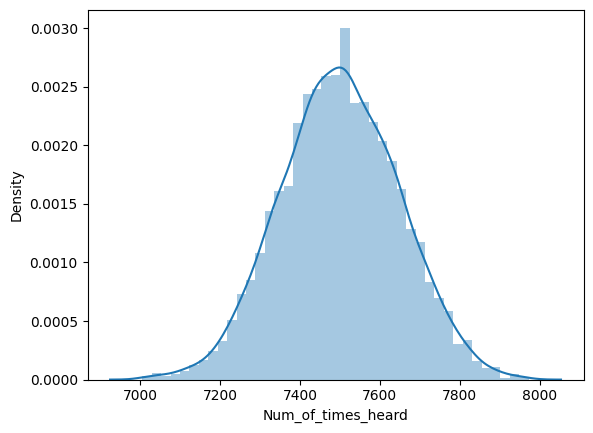

In [29]:
%matplotlib inline
ax = sns.distplot(df1['Num_of_times_heard'])

In [30]:
sum_songs=df.sum(axis=0,skipna=True)

In [32]:
sum_songs

song_1       7584
song_2       7635
song_3       7748
song_4       7748
song_5       7693
             ... 
song_4996    7749
song_4997    7808
song_4998    7406
song_4999    7471
song_5000    7673
Length: 5000, dtype: int64

In [33]:
min(sum_songs)

7006

In [34]:
np.where(sum_songs==7006)

(array([2713], dtype=int64),)

In [35]:
# song_2713   (7006) is the most listened song by the users.

In [36]:
user_sum=df.sum(axis=1,skipna=True)

In [37]:
df2=pd.DataFrame(data=user_sum,columns=['Frequency_of_users'])
df2['user_num']=range(1,1001)
df2

,Frequency_of_users,user_num
user_1,37330,1
user_2,37203,2
user_3,37304,3
user_4,37756,4
user_5,37172,5
...,...,...
user_996,37647,996
user_997,37336,997
user_998,37085,998
user_999,38041,999


In [38]:
df2['bins']=pd.cut(x=df2['Frequency_of_users'],bins=3,labels=['Least Active user','Moderate User','Active user'])
df2

,Frequency_of_users,user_num,bins
user_1,37330,1,Moderate User
user_2,37203,2,Moderate User
user_3,37304,3,Moderate User
user_4,37756,4,Moderate User
user_5,37172,5,Moderate User
...,...,...,...
user_996,37647,996,Moderate User
user_997,37336,997,Moderate User
user_998,37085,998,Least Active user
user_999,38041,999,Active user


<AxesSubplot: xlabel='bins', ylabel='count'>

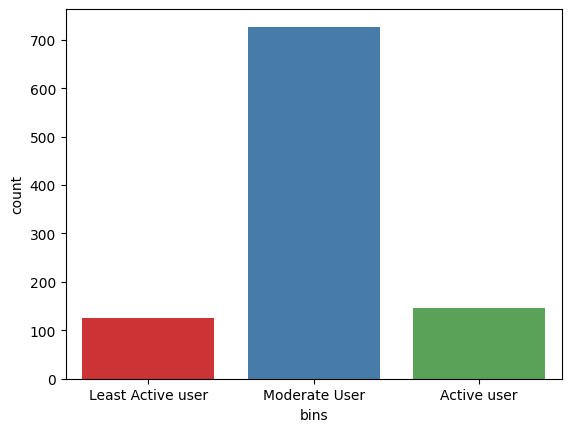

In [39]:
sns.countplot(x='bins',data=df2,palette='Set1')

<AxesSubplot: xlabel='Frequency_of_users', ylabel='user_num'>

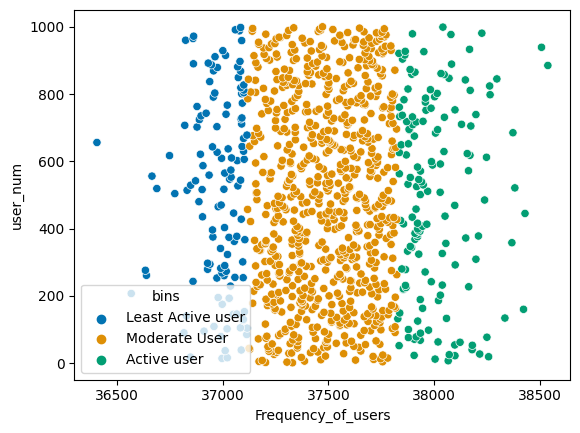

In [40]:
%matplotlib inline 
sns.scatterplot(x='Frequency_of_users',y='user_num',data=df2,hue='bins',palette='colorblind')

In [41]:
user_sum=df.sum(axis=1,skipna=True)

In [42]:
user_sum

user_1       37330
user_2       37203
user_3       37304
user_4       37756
user_5       37172
             ...  
user_996     37647
user_997     37336
user_998     37085
user_999     38041
user_1000    37472
Length: 1000, dtype: int64

In [43]:
min(user_sum)

36406

In [44]:
np.where(user_sum==36406)

(array([655], dtype=int64),)

In [51]:
max(user_sum)

38537

In [46]:
np.where(user_sum==38537)

(array([884], dtype=int64),)

In [47]:
# user_656 (36406) is the least active user since he/she has listened to least no. of songs.
# user_885 (38537) is the most active user since he/she has listened to most number of songs.

In [48]:
X = df.values #converted data points into a sparse matrix

In [50]:
X

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [52]:
from sklearn.decomposition import NMF # Non-negative matrix factorisation

In [53]:
nmf = NMF(n_components=100,max_iter=1000,random_state=200)
# Matrix 1 = 1000 x 100
# Matrix 2 = 100 x 5000

In [54]:
nmf.fit(X)

NMF(max_iter=1000, n_components=100, random_state=200)

In [55]:
user_matrix = nmf.transform(X)

In [56]:
user_matrix.shape

(1000, 100)

In [57]:
song_matrix = nmf.components_.T

In [58]:
song_matrix.shape

(5000, 100)

In [59]:
user_matrix

array([[0.19722292, 0.00838694, 0.00895132, ..., 0.02674663, 0.        ,
        0.40378076],
       [0.22727904, 0.01329248, 0.02898355, ..., 0.        , 0.        ,
        0.53579931],
       [0.        , 0.        , 0.00577995, ..., 0.        , 0.34509752,
        0.41067604],
       ...,
       [0.26535226, 0.02369387, 0.01539524, ..., 0.11803238, 0.13481547,
        0.48994411],
       [0.19807624, 0.00821421, 0.02085673, ..., 0.        , 0.        ,
        0.55226051],
       [0.11565735, 0.        , 0.01373736, ..., 0.        , 0.        ,
        0.35888077]])

In [60]:
song_matrix

array([[ 3.93393479,  0.        , 16.76257992, ...,  1.87668135,
         7.77969372,  5.46046276],
       [ 4.06147602, 22.15764737,  0.        , ...,  0.54741667,
         7.65215619,  5.49073627],
       [ 0.76340747,  1.63347198,  0.55142699, ..., 10.94813245,
         3.72359537,  6.91373034],
       ...,
       [ 0.        ,  9.60597482, 15.77361586, ...,  5.49135618,
         4.61600588,  6.64591194],
       [ 0.        , 17.23192915, 14.33875589, ...,  4.97328033,
         4.71904124,  6.77212333],
       [ 4.32694724, 35.78686719,  0.        , ...,  4.04455577,
         6.9814245 ,  5.59599701]])

Steps in building a recomendation system:

Consider recommending songs to user 1. (row loaction:0)
Find the Euclidean distance/direct distance between the user1 and all the other users(999).
Find out the top 10 songs heard by the closest 5 users.
Recommend the songs to user 1.

In [61]:
# Calculating direct distance or Euclidean distance

def caldist(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2)for x in range(len(u1))]),0.5)


In [62]:
caldist(user_matrix[0],user_matrix[1])

0.17743958064600537

In [63]:
# Calculating distance between base user and all other users

def distfromuser(wuser,user_matrix):
    import sys
    distance = []
    for i in range(len(user_matrix)):
        if wuser != i:
            distance.append(caldist(user_matrix[wuser],user_matrix[i]))
        else:
            pass
    return distance

In [64]:
distuser1 = distfromuser(0,user_matrix)

In [65]:
distuser1

[0.17743958064600537,
 0.4054602072387608,
 0.34246951737030146,
 0.18353075770082425,
 0.19881543543166535,
 0.38965933403683356,
 0.12645391334567077,
 0.2971145837436277,
 0.41595932672145447,
 0.47452390833259533,
 0.18864322885010767,
 0.47626794448306037,
 0.44321184545987863,
 0.47386591764405417,
 0.26406295773921984,
 0.43227574174525046,
 0.1875364538728946,
 0.35409376014900945,
 0.1869164976757604,
 0.21490967042563133,
 0.1026612025204796,
 0.28527010529560914,
 0.3916642380102712,
 0.21449391276769939,
 0.2660887047887859,
 0.3017180977046749,
 0.4647884512189647,
 0.2953209404915285,
 0.27330352662711216,
 0.2480412747933892,
 0.26238107290939844,
 0.40023290681110885,
 0.45222740321173455,
 0.3678909548330879,
 0.25655744682324105,
 0.1680952486138302,
 0.5737918951346017,
 0.42973751414289957,
 0.2601333691103979,
 0.37979874045110523,
 0.40604008787639606,
 0.1846041473377224,
 0.5072340887633576,
 0.19441459241042827,
 0.19981623369512852,
 0.442253560406541,
 0.2056

In [66]:
user_index = np.argsort(distuser1)[0:5] #sorts into ascending order and converts into an array

In [67]:
user_index

array([304, 887, 732, 897, 308], dtype=int64)

In [68]:
# finding songs heard by closest users

for i in user_index:
    print("Songs Heard by the user in index ",i," are:")
    temp = pd.DataFrame(df.iloc[i])
    print(temp[temp.values != 0].index)

Songs Heard by the user in index  304  are:
Index(['song_1', 'song_2', 'song_4', 'song_5', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4689)
Songs Heard by the user in index  887  are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4732)
Songs Heard by the user in index  732  are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_9', 'song_10',
       'song_11', 'song_12', 'song_13',
       ...
       'song_4988', 'song_4989', 'song_4990', 'song_4991', 'song_4992',
       'song_4993', 'song_4996', 'song_4997', 'song_49

In [69]:
# Recommending Top 5 songs

def Top5songs(user_index,df):
    temp_df = df.iloc[user_index] # contains all the values coming from user_index
    dict1 = temp_df.max().to_dict() # it gives the songs which are heard the maximum times
    sorted_dictionary = sorted(dict1.items(),key=lambda keyvalue :(keyvalue[1],keyvalue[0]),reverse=True)[0:5]
    return [x[0] for x in sorted_dictionary]

In [70]:
Top5songs(user_index,df)

['song_996', 'song_990', 'song_989', 'song_982', 'song_981']

In [71]:
# Using K-Means for clustering

In [72]:
from sklearn.cluster import KMeans

In [82]:
withincluster_meansquareerror = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k,max_iter=1000,n_init=1).fit(song_matrix)
    withincluster_meansquareerror[k] = kmeans.inertia_

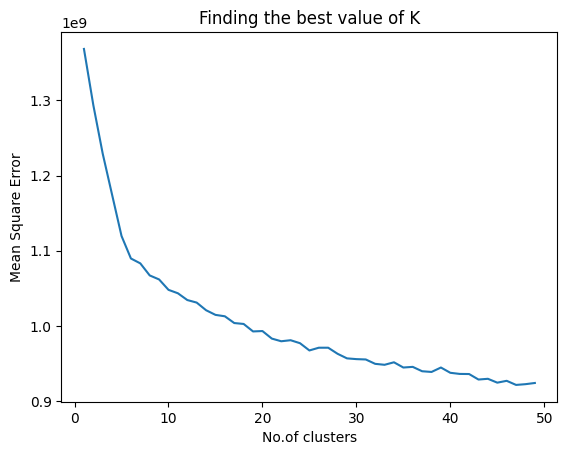

In [83]:
plt.figure()
plt.plot(list(withincluster_meansquareerror.keys()),list(withincluster_meansquareerror.values()))
plt.xlabel("No.of clusters")
plt.ylabel("Mean Square Error")
plt.title("Finding the best value of K")
plt.show()

In [84]:
def fav_songs(data,no_of_clusters,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=no_of_clusters,max_iter=1000).fit(song_matrix) #makes cluster of the songs
    index_in_songs=data.columns.to_list().index(song_name) #gets the index of the base song from the main database
    song_vector=song_matrix[index_in_songs] #it takes the values of the base song from the decompose song matrix
    allsongs_in_cluster=list(kmeans.predict(song_matrix)) # Prepares clusters for all the song in the song matrix
    songs_in_cluster_of_basesong=[x for x in range(len(allsongs_in_cluster)) if allsongs_in_cluster[x]==kmeans.predict([song_vector])]##checking the song which are alike a base song
    song_cluster=song_matrix[songs_in_cluster_of_basesong]
    KNN=NearestNeighbors(n_neighbors=n_recommendation)
    KNN.fit(song_cluster)
    recommended_songs=KNN.kneighbors([song_matrix[index_in_songs]])
    col_list=list(df.columns)
    return [col_list[x] for x in recommended_songs[1][0]]
    

In [85]:
fav_songs(df,12,song_matrix,"song_2",5)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['song_1', 'song_778', 'song_805', 'song_106', 'song_630']

In [81]:
 fav_songs(df,12,song_matrix,"song_1001",5)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['song_61', 'song_154', 'song_134', 'song_138', 'song_2']

In [86]:
fav_songs(df,12,song_matrix,"song_2101",5)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['song_234', 'song_55', 'song_249', 'song_170', 'song_245']

In [87]:
fav_songs(df,12,song_matrix,"song_4560",5)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['song_502', 'song_17', 'song_445', 'song_444', 'song_322']

In [88]:
fav_songs(df,12,song_matrix,"song_4999",5)

C:\Users\Mahendran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['song_173', 'song_37', 'song_38', 'song_112', 'song_80']